In [1]:
import hdfdict
import h5py
import numpy as np

fname = 'nfrz_multomega_20230412_1120.h5'
f = h5py.File(fname, 'r')
fulldata = hdfdict.load(fname)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

1.5707963267948966 100


In [2]:
omegas = np.array([value['metadata']['omega'] for key, value in fulldata.items()])


print(omegas, len(omegas))

[ 1.29    1.3625  2.8     3.195   3.59    3.985   4.38    8.      8.35
  8.7     9.05    9.4     1.435   9.5    12.125  14.75   17.375  20.
  1.5075  1.58    1.6     1.825   2.05    2.275   2.5   ] 25


/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


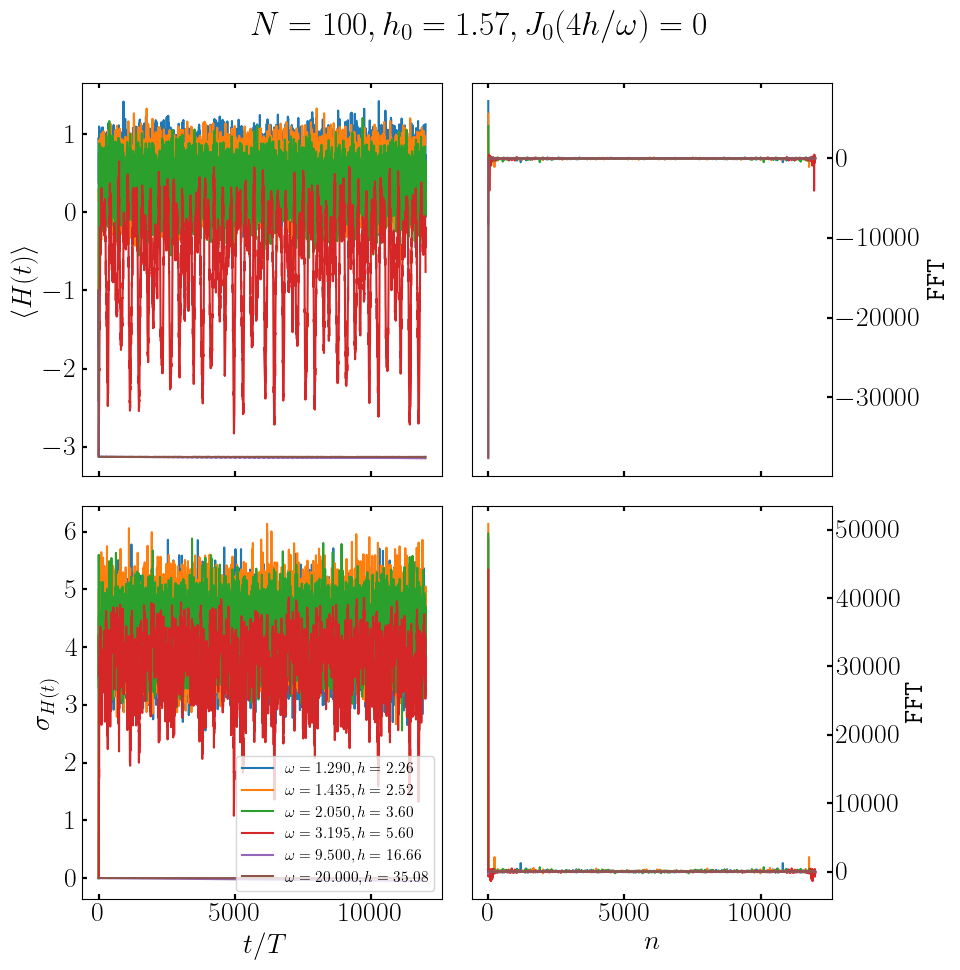

In [8]:
from scipy.special import j0
import matplotlib.pyplot as plt
from scipy.fft import fft

keys = ['0','2','7','11','20','24']

fig,axs = plt.subplots(2,2, tight_layout=True, figsize=(10, 10))

fig.suptitle(fr'$N={N}, h_0={h0:1.2f}, J_0(4h/\omega)=0$')

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    axs[0,0].plot(data['eavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[0,1].plot(fft(data['eavg']),label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,0].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,1].plot(fft(data['evar']),label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')


axs[0,0].set_ylabel(r"$\langle H(t) \rangle$")


axs[1,0].set_ylabel(r"$\sigma_{H(t)}$")
axs[1,0].set_xlabel(r"$t/T$")
axs[0,1].set_ylabel(r"FFT")
axs[1,1].set_ylabel(r"FFT")
axs[1,1].set_xlabel(r"$n$")
axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
axs[0,1].yaxis.set_label_position("right")
axs[1,1].yaxis.set_label_position("right")
axs[0,0].xaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[1,0].legend(loc='lower right', fontsize=11)

#axs[0,0].set_ylim((-3.5, 0.1))
#axs[0,1].set_ylim((-1.01, -0.5))
#axs[1,0].set_ylim((-3.5, 0.1))
#axs[1,1].set_ylim((-3.5, 0.1))


#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [2,3,0,5,6,4]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

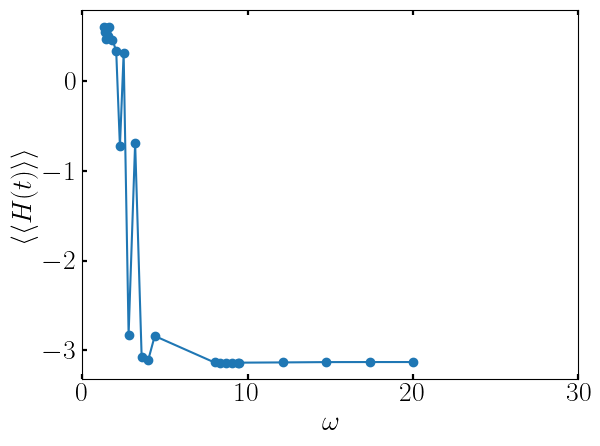

In [9]:
import numpy as np
import matplotlib.pyplot as plt

allkeys = [str(i) for i in np.arange(len(omegas))]


allomegas = []
ebar = []
evbar = []
for key in allkeys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    allomegas.append(omega)
    h = data['metadata']['h']
    ebar.append(np.average(data['eavg']).real)
    evbar.append(np.average(data['evar']).real)

x, y = zip(*sorted(zip(allomegas,ebar)))
plt.plot(x,y,marker='o')
plt.xlim((0.0,30.0))
plt.xlabel(fr'$\omega$')
plt.ylabel(fr'$\langle\langle H(t)\rangle\rangle$')
plt.show()

In [11]:
print(omegas)

[ 1.29    1.3625  2.8     3.195   3.59    3.985   4.38    8.      8.35
  8.7     9.05    9.4     1.435   9.5    12.125  14.75   17.375  20.
  1.5075  1.58    1.6     1.825   2.05    2.275   2.5   ]


(-0.05, 1.05)

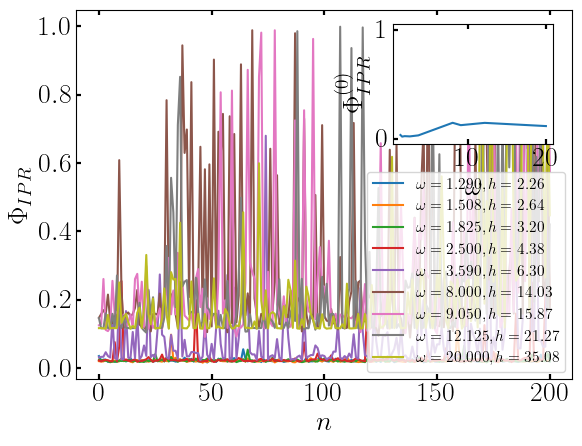

In [17]:
from scipy.special import j0
import matplotlib.pyplot as plt


chosen_state = 0
allkeys = [str(i) for i in np.arange(len(omegas))]

keys = ['0','3','6','9','12','15','18', '21','24']



fig, ax1 = plt.subplots()

allomegas = []
iprdata = []

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    allomegas.append(omega)
    h = data['metadata']['h']
    ax1.plot(data['ipr'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    iprdata.append(data['ipr'][chosen_state])

    
ax1.set_ylabel(r"$\Phi_{IPR}$")
ax1.set_xlabel(r"$n$")
ax1.legend(loc='lower right', fontsize=11)

left, bottom, width, height = [0.62, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
x, y = zip(*sorted(zip(allomegas,iprdata)))
ax2.plot(x,y)
ax2.set_xlabel(r"$\omega$")

ax2.set_ylabel(r"$\Phi^{(0)}_{IPR}$")
ax2.set_ylim((-0.05,1.05))


#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [2,3,0,5,6,4]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])